# Seattle Weather Prediction Project 

## Introduction
The aim of this project is to predict weather conditions in Seattle using previous weather data. The dataset in the csv file includes various measurements such as precipitation, 
minimum and maximum temperatures, and wind speed. The target variable is the type of weather, which includes rain, drizzle, sun and snow. The goal is to build and evaluate a 
machine learning model, which is capable of predicting the weather type based on these features within previous data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Loading the Dataset
Inside the cell below, I load the Seattle Weather csv dataset file into a pandas dataframe. This enables me to explore the data structures and prepare it for modelling.
The dataset contains information such as past daily weather observations. 

In [ ]:
# Load dataset 
import os
print("Files here:", os.listdir())  # sanity check
df = pd.read_csv('seattle-weather.csv')
df.head()


Files here: ['project_assessment.ipynb', 'seattle-weather.csv']


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


## Exploring the Data
I started off by checking the datasets structure, what type of data is stored within each column, and whether there are any values that are missing. I also checked the distribution
of the weather target variable, to understand the balance of each weather category. This helps to determine how much cleaning is required. 

In [ ]:
# Structure and missing values
df.info()
df.isna().sum().sort_values(ascending=False).head(20)

# Peek at target distribution 
print("\nTarget value counts:")
print(df['weather'].value_counts(dropna=False))
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB

Target value counts:
weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


In [9]:
print(df.head())
print(df.columns)

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


## Data Cleaning
After checking the dataset, we can confirm that it is clean as it does not contain any missing values. Therefore, only minimal cleaning is required. I removed the date column, as it is 
stored as text and cannot be used by the machine learning model without any further processing. All the other remaining columns however, are numeric so are ready to be used as features.

In [ ]:
# Clean dataset
df_clean = df.copy()

# Drop the date column 
df_clean = df_clean.drop(columns=['date'])

df_clean.head()


,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


## Splitting the Data
The features (x) include precipitation, minimum and maximum temperatures and wind speed. The target (y), is the weather column. I split the data into training and testing sets in order
to evaluate the performance of the model on unseen data. A stratified split is used in order to ensure that all weather categories are represented proportionally. 

In [11]:
# Define target
TARGET = 'weather'
assert TARGET in df_clean.columns, f"Can't find target column '{TARGET}'."

# Features and target
X = df_clean.drop(columns=[TARGET])
y = df_clean[TARGET]

from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((1168, 4), (293, 4))

## Model Selection and Training 
I chose a Random Forest Classifier for this project, as it handles numerical data well and is effective for multi-class problems. It also captures non linear relationships
and provides feature important scores, which help interpret the model. The model is also trained on the training set using default parameters with 300 decision trees.  

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Model Evaluation
The model is evaluated using accuracy and a classification report. It includes precision, recall, and F1-scores for each weather category. A confusion matrix is also plotted to 
visualise how well the model predicts each class. This helps to identify the strengths and weaknesses of the model's performance.

Accuracy: 0.8156996587030717

Classification Report:

              precision    recall  f1-score   support

     drizzle       0.14      0.09      0.11        11
         fog       0.21      0.15      0.18        20
        rain       0.97      0.91      0.94       129
        snow       1.00      0.60      0.75         5
         sun       0.78      0.89      0.83       128

    accuracy                           0.82       293
   macro avg       0.62      0.53      0.56       293
weighted avg       0.80      0.82      0.81       293



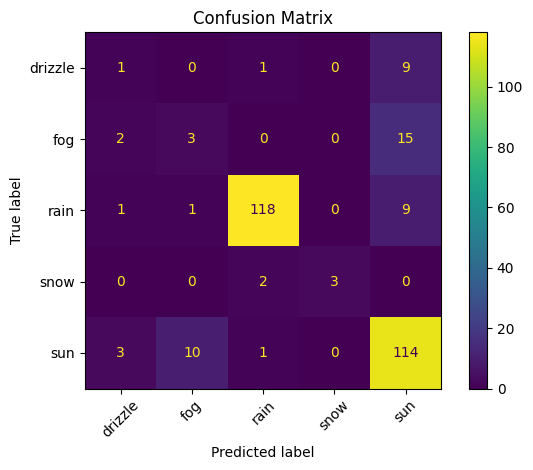

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# RandomForest Model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


## Feature Importance
Feature importance showcases which input features have contributed the most to the predictions made by the model. Having a good understanding on feature importance provides 
insight into how the model makes decisions. For instance, precipitation is expected to be very important when it comes to predicting rainy weather.

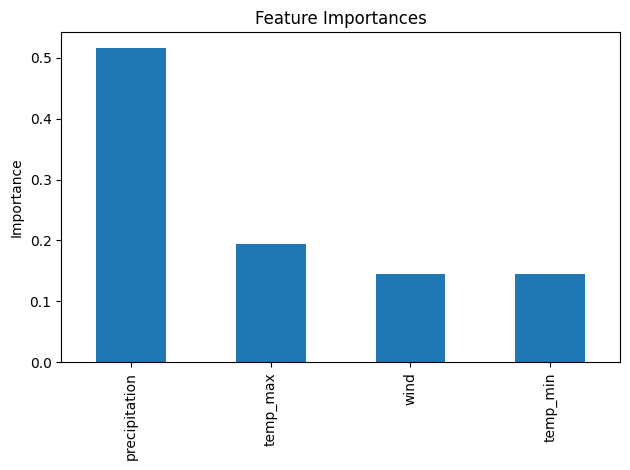

precipitation    0.515666
temp_max         0.194149
wind             0.145681
temp_min         0.144503
dtype: float64

In [15]:
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

feature_importances.sort_values(ascending=False)


In [16]:
import pickle

with open('weather_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Saved model to weather_model.pkl")



Saved model to weather_model.pkl


## Conclusion 
Through this project, I was able to successfully build a machine learning model, which classifies upcoming weather conditions in Seattle. The Random Forest Classifier performed well,
and the feature importance results had aligned with expectations, with precipitation being the strongest predictor for rainy weather. If I was to extend the project further, I would
explore hyperparameter tuning, try additional models including Gradient Boosting, as well as investigating class imbalance more closely. Overall, this project enabled me to enhance
my understanding of data exploration, model training and evaluation in a classification task. 

## Model Deployment using Flask
In order for users to gain access to the model, I created a flask web application, which enables them to interact and input numerical characters to obtain a weather prediction result.
The app loads the trained Random Forest model from a .pkl file, and allows users to input these numerical characters for precipitation, temperature, and wind. After these values have
been inputted by the user, the app returns the predicted weather result. Overall, this app demonstrates how machine learning models are able to be used in real world scenarios.

## Ethical Considerations
Weather prediction is generally a low-risk area to cover. However, it is still crucial to be mindful that machine learning models are still at risk of producing misleading or 
incorrect results to a user. If used in real situations, incorrect predictions could potentially impact future planning, travelling and decision making. The dataset included may
contain anomalies, whereby certain weather types would occur very rarely, which could reduce accuracy slightly. To clarify, the output produced by the model is a statistical estimate
which is based on previous real data on Seattle weather.

## AI Usage Statement
This assignment used generative AI for brainstorming, project ideas, planning the workflow, and receiving feedback during development.